# Introduction to Entanglement Entropy

In [1]:
%%capture
!pip install qiskit

In [ ]:
%%capture
!pip install qiskit-aer

In [2]:
%%capture
!pip install pylatexenc
# restart the notebook

In [3]:
import numpy as np
from qiskit import *
import math as m
from scipy import linalg as la
%matplotlib inline

## A bit of Information Theory

### Probability Distributions

In this notebook we will focus on *finite* probability distributions. A **finite probability distribution** is a function

\begin{align}
f: X \to [0,1],
\end{align}

from some finite set $X$ into the interval $[0,1]$. The finite set $X = \{x_1, x_2, ..., x_n\}$ is generally thought of as as set of possible events that can occur and the value $f(x_i) \in [0,1]$ is the associated probability that the event $x_i$ will occur. The function $f$ must satisfy the condition that

\begin{align}
\sum_i f(x_i) = 1,
\end{align}

so that all of the probabilities sum to $1$. As an example, if we have a coin that we can flip, we can take the set of events $X = \{h, t\}$ ("*heads*" or "*tails*"), and the probabilities are $f(h) = 1/2$ and $f(t) = 1/2$. Obviously $f(h) + f(t) = 1$, and so the function $f:X \to [0,1]$ is a probability distribution on the set $X$. If we have a six sided die, we can take the set of events to be $Y = \{1,2,3,4,5,6\}$, and the probabilities are

\begin{align}
g(1) = g(2) = \cdots g(6) = 1/6.
\end{align}

Since

\begin{align}
\sum_i f(i) = 1,
\end{align}

the function $g:Y \to [0,1]$ is also a probability distribution (on the set of events $Y$). Now, we can have **joint probability distributions** which are described by functions like $(f \times g): X \times Y \to [0,1]$. In this case, we can write out a table of probabilities

\begin{align}
\begin{matrix}
\ & 1    & 2    & 3    & 4    & 5    & 6 \\
t & 1/12 & 1/12 & 1/12 & 1/12 & 1/12 & 1/12 \\
h & 1/12 & 1/12 & 1/12 & 1/12 & 1/12 & 1/12
\end{matrix}
\end{align}

In this case, the outcomes from the set $X$ were entriely independent from the outcomes from the set $Y$. The coin flip has no effect on the dice roll, and the dice roll has no effect on the coin flip. This is not always the case though. Sometimes we have joint probabilities that depend on one another. In this case we have **conditoonal probabilities** where the probability that event $y \in Y$ happens depends on an event $x \in X$. The notation for this is

\begin{align}
p(y|x) = \frac{p(x, y)}{p(x)}
\end{align}

where $p(x, y)$ is the probability that $x \in X$ occurs *and* $y \in Y$ occurs. We also assume that if $p(x) = 0$ then $p(y|x) = 0$.

### Self-Information

The idea behind self-information is the following

* if an event always occurs, we associate it with a smaller amount of information. It will not suprise us!
* On the other side, a rare event is associated with a huge amount of information. It will suprise us!

I am not surprise to see the sunrise every morning (likely event). Instead,  I would be really suprised if tomorrow the Sun will not rise (unlikely event). This amount of surprise or self-information of the event $x$ is quantified by

$$I(x) = - \log p(x),$$

where $p(x)$ is the probability of the event $x$. If $p(x)=1$, then self-info is zero. A rare event instead has a huge surpise factor.

### Shannon Entropy

In textbooks, the set of events $X$ that are possible is often called a **random variable**.

* The **Shannon entropy** gives a precise definition of how much information we gain on average by learning the value of a random variable.

* On the other way around, the **entropy** of $X$ defines the amount of uncertainty we have about $X$ before learning the outcome value.

So, suppose we have some finite set of events (or a random variable) $X = \{x_1, ..., x_n\}$, with an associated probability distribution $f:X \to [0,1]$ that takes values $\{f(x_1), ..., f(x_n)\}$. The **Shannon Entropy** is defined as

\begin{align}
H(X) = H(f(x_1), ..., f(x_n)) = -\sum_{i=1}^n f(x_i) \log(f(x_i)).
\end{align}

Here, the logarithm is taken to be base $2$. Each probability is a value $0 \leq f(x_i) \leq 1$, and since $f$ is a probability distribution we must have $\sum_i f(x_i) = 1$. Let's look at the case of a coin toss. The Shannon entropy in this case would be

\begin{align}
H(X) &= H(f(h), f(t))\\
&= -f(h)\log(f(h)) - f(t)\log(f(t)) \\
&= -(1/2)\log(1/2) - (1/2)\log(1/2) \\
&= -\log(1/2) \\
&= \log(2) \\
&= 1.
\end{align}

Now, let's look at the case of a six-sided die. The Shannon entropy in this case is

\begin{align}
H(Y) &= H(g(1), ..., g(6))\\
&= -\sum_{i=1}^6 g(i) \log(g(i)) \\
&= -6\left( (1/6)\log(1/6) \right)\\
&= -\log(1/6).
\end{align}

We can easily get a decimal approximation of this in Python as follows.

In [34]:
# Compute Shannon Entropy of random variable for six sided die
HY = -m.log2(1/6)
print(HY)

2.584962500721156


As another example, let's take the random variable $X$ which can take values $\{x_1, x_2, x_3, x_4\}$. Let the associated probability distribution be $\{f(x_1) = 1/8, f(x_2) = 1/4, f(x_3) = 1/8, f(x_4) = 1/2 \}$. Let's define these probabilities in Python.

In [35]:
# Define the probability distibution f:X --> [0,1]
fx_1 = 1/8
fx_2 = 1/4
fx_3 = 1/8
fx_4 = 1/2

In [36]:
# Check that these sum to one
fx_1+fx_2+fx_3+fx_4

1.0

Now, let's compute the Shannon entropy.

In [37]:
HX = -(fx_1*m.log2(fx_1) + fx_2*m.log2(fx_2) + fx_3*m.log2(fx_3) + fx_4*m.log2(fx_4))
print(HX)

1.75


## Pure States vs Mixed States

👉 **Pure State**: A pure state represents a quantum system in a specific, well-defined state, and can be described by a single wavefunction (or quantum state vector). This is the most complete description possible of a system's quantum state.

A pure state is represented by a ket vector $|\psi⟩$ in a Hilbert space. The state vector can be written as a superposition of basis states with complex coefficients that obey the normalization condition $⟨ψ|\psi⟩=1$. Example of a pure state is: $|\psi⟩ = α|0⟩ + β |1⟩$.

A pure state has these properties:

* Complete knowledge: A pure state reflects a situation where we have maximal information about the system (Entropy is zero). This is different from the classical situation of a coin. In this case, before the coin reaches the ground and is revealed it is entirely head or entirely tail with $50$% (so Shannon Entropy is positive).
* Coherence: Pure states exhibit quantum coherence, meaning phases of the wavefunction are meaningful and can exhibit interference.
* Deterministic evolution: Under closed evolution (no external interaction), a pure state evolves to another pure state according to the Schrödinger equation.

Examples of pure state are:

* $|\psi⟩ = α|0⟩ + β |1⟩$
* $|\psi\rangle = |0\rangle ⊗|0⟩$ (product state)
* Bell states. In particular, they are pure maximally entangled (i.e non-separable) states

👉 **Mixed state**: A mixed state represents a statistical mixture of different pure states. It's used when there's uncertainty or incomplete information about the exact state of the system, often due to entanglement with another system or the environment. Mixed states often arise due to a lack of complete information about a system or as a result of tracing out part of an entangled system, they can still be entangled with other systems.

Mixed states are described by a **density matrix** $ρ$. The density matrix for a mixed state is a weighted sum of the outer products of state vectors, where the weights correspond to the probabilities of the system being in each of those states: $ρ = ∑_i p_i |ψ_i⟩⟨ψ_i|$ with $\sum_i p_i=1$.

A mixed state has these properties:

* Incomplete knowledge: A mixed state reflects partial or probabilistic knowledge about the system.
* Decoherence: Mixed states often result from decoherence, where quantum superpositions are lost due to interaction with the environment.
* Non-deterministic evolution: The evolution can be affected by external interactions, leading to transitions between pure states in the mixture.

Example of mixed state:

* $\rho = \frac{1}{2} |0⟩⟨0| + \frac{1}{2} |1⟩⟨1| = \begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}.$

🤔 **Can we represent a pure state with a density matrix?**

While density matrices are often used to describe mixed states, they are also perfectly valid for representing pure states. For a pure state described by a wavefunction |ψ⟩, the corresponding density matrix is given by the outer product of the state with itself: $\rho = |ψ\rangle ⟨ψ|$.

The $\rho$ of a pure state has the following properties:

* Rank: The density matrix of a pure state has rank 1, meaning it has only one nonzero eigenvalue.

* Trace: The trace of the density matrix (the sum of its diagonal elements) is 1, reflecting the normalization of the quantum state.

* Idempotency: For pure states, the density matrix is idempotent, meaning that $\rho^2 = \rho$.



## General Definition of von Neumann Entropy


As we saw, the Shannon entropy measure uncertainty related to a *classical probability distribution*. We recall that, in a way very similar to probability distributions, a density matrix is a way of describing the state of a quantum system, or equivalently possible outcomes of measurements.

The **von Neumann Entropy** of a quantum state represented by the density matrix $\rho$ is defined to be

\begin{align}
S(\rho) = -Tr(\rho \log(\rho)).
\end{align}

Here, the lograithm is now a *matrix logarithm*, which is also taken to be base $2$. If we let $\{\lambda_k\}$ be the complete set of *eigenvalues* of the matrix $\rho$, then we can also define the von Neumann entropy as

\begin{align}
S(\rho) = -\sum_k \lambda_k \log(\lambda_k).
\end{align}

The logarithm of a matrix, like exponentials and trigonometric functions of matrices, can be defined in terms of a power series. Assuming $||A-I|| < 1$, then the following power series is convergent and defines the lograithm of a matrix,

\begin{align}
\log(A) &= \sum_{k=1}^{\infty} (-1)^{k+1}\frac{(A-I)^k}{k} \\
&= (A-I) - \frac{(A-I)^2}{2} + \frac{(A-I)^3}{3} \cdots.
\end{align}

### Some Examples

Matrix logarithms can be computed in Python using `scipy.linalg.logm()`. We have already imported `linalg` as `la` from SciPy. Let's look at an example. Take the matrix

\begin{align}
\rho = \frac{1}{3} |l⟩⟨l| + \frac{2}{3} |0⟩⟨0|&=\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}.
\end{align}

where $|l⟩=\frac{|0⟩+i|1⟩}{\sqrt{2}}$.

In [38]:
rho = np.matrix([[5/6, 1/6],
                 [1/6, 1/6]])

la.logm(rho)

array([[-0.23779441,  0.43040894],
       [ 0.43040894, -1.95943017]])

To get the appropriate base $2$, we need to use a conversion

\begin{align}
\log_2(ρ) = \frac{\log_e(\rho)}{\log_e(2)}.
\end{align}

So, what we really need is,

In [39]:
rho = np.matrix([[5/6, 1/6],
                 [1/6, 1/6]])

la.logm(rho)/la.logm(np.matrix([[2]]))

array([[-0.34306481,  0.62094884],
       [ 0.62094884, -2.82686019]])

We can compute the von Neumann entropy using the trace of this matrix as follows,

In [40]:
S = -np.matrix.trace(rho*la.logm(rho)/la.logm(np.matrix([[2]])))
print(S)

[[0.55004776]]


This is a $1 \times 1$ matrix, i.e. a scalar value, as expected. Let's define a function for density matrices that computes the von Neumann entropy.

In [41]:
def von_neumann_entropy(rho):
    R = rho*(la.logm(rho)/la.logm(np.matrix([[2]])))
    S = -np.matrix.trace(R)
    return S

Now, let's test this function out on our matrix `rho`.

In [42]:
von_neumann_entropy(rho)

matrix([[0.55004776]])

Great, now, let's look at a few more examples. Suppose we have a composite system with density operator given by

\begin{align}
\rho = \rho_1 \otimes \rho_2
\end{align}

where

\begin{align}
\rho_1 &=
\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}\\
\rho_2 &=
\begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}.
\end{align}

Let's compute $S(\rho)$ using Python. First we compute the tensor product of the matrices using the Kronecker product `np.kron()` function in NumPy.

In [43]:
rho1 = np.matrix([[5/6, 1/6],
                  [1/6, 1/6]])

rho2 = np.matrix([[1/2, 0],
                  [0, 1/2]])

rho3 = np.kron(rho1, rho2)

print(rho3)

[[0.41666667 0.         0.08333333 0.        ]
 [0.         0.41666667 0.         0.08333333]
 [0.08333333 0.         0.08333333 0.        ]
 [0.         0.08333333 0.         0.08333333]]


Next, let's apply our function `von_neumann_entropy()` to this matrix.

In [44]:
von_neumann_entropy(rho3)

matrix([[1.55004776]])

Now, we should check that we are getting the correct answer by using the alternate definition of von Neumann entropy in terms of the eigenvalues of the matrix. Let's compute the eigenvalues of this `rho` using Python.

In [45]:
EV = la.eigvals(rho3)
print(np.matrix(EV).H)

[[0.436339-0.j]
 [0.063661-0.j]
 [0.436339-0.j]
 [0.063661-0.j]]


Computing this out the long way, we get

In [46]:
-(0.436339*m.log2(0.436339)+0.063661*m.log2(0.063661)+0.436339*m.log2(0.436339)+0.063661*m.log2(0.063661))

1.5500477491690314

Let's define a function to compute the von Neumann entropy using the eigenvalues of the density matrix.

In [47]:
def vn_eig_entropy(rho):
    EV = la.eigvals(rho)

    # Drop zero eigenvalues so that log is defined
    my_list = [x for x in EV.tolist() if x]
    EV = np.array(my_list)

    log2_EV = np.matrix(np.log2(EV))
    EV = np.matrix(EV)
    S = -np.dot(EV, log2_EV.H)
    return(S)

In [48]:
vn_eig_entropy(rho3)

matrix([[1.55004776-0.j]])

Using the eigenvalue version, we do indeed get the same answer. Let's look at one more example. Take

\begin{align}
\rho_{GHZ} = \frac{1}{3}|000\rangle \langle 000| + \frac{2}{3}|111\rangle \langle 111|.
\end{align}

Let's compute the von Neumann entropy of this density matrix based on the GHZ like state $\frac{1}{3}|000\rangle + \frac{2}{3}|111\rangle$ in Python.

In [49]:
u = np.matrix([[1],
               [0]])

d = np.matrix([[0],
               [1]])

uuu = np.kron(u, np.kron(u,u))

ddd = np.kron(d, np.kron(d,d))

GHZ = np.dot(uuu, uuu.H)/3 + 2*np.dot(ddd, ddd.H)/3

print(GHZ)

[[0.33333333 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.66666667]]


Notice that this matrix has (many) eigenvalues that are zero since it is singular. This is taken care of by setting $0 \log(0) \equiv 0$ in the second calculation of von Neumann entropy in terms of eigenvalues. The function `vn_eig_entropy` takes care of this by converting the array of eigenvalues to a list, then using *list comprehension* to drop the zero entries, and then converting back to a numpy array for the rest of the calculations.

In [50]:
von_neumann_entropy(GHZ)

/usr/local/lib/python3.11/dist-packages/scipy/linalg/_matfuncs.py:202: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)


matrix([[0.91829583]])

In [51]:
vn_eig_entropy(GHZ)

matrix([[0.91829583-0.j]])

## Entanglement Entropy (bi-partite system)

The von Neumann entanglement entropy is a measure of the entanglement present in a quantum system that is bipartite, i.e., it consists of two subsystems. It quantifies the amount of entanglement between the two subsystems by measuring the amount of information that is lost when one of the subsystems is traced out.

Suppose we have a bipartite quantum system consisting of two subsystems $A$ and $B$, leaving in Hilbert spaces $H_A$ and $H_B$. The global Hilbert space
is the tensor product $H=H_A ⊗ H_B$. Any pure state can be written
as
$$|ψ\rangle = \sum_{i, j} c_{i,j} |i⟩_A⊗|j⟩_B $$

where $\{|i\rangle_{A(B)}\}_{i=0}^{d-1}$ are orthogonal bases for each subsystem (if $d=2$, $|i\rangle = \{|0⟩, |1⟩\}$ ).

<center><img src="https://drive.google.com/uc?id=1mG0mg2O49gpEC8bFL_6iWF8IEI0Kg9ya" width="700"/>
</center>


The state of one of the subsystems, in general, will be described by the reduced density matrix, for instance, for subsystem $A$: $$\rho_A = Tr_B ρ = Tr_B |\psi⟩ \langle ψ| = \sum_i \langle i |_B|\psi⟩ \langle ψ||i\rangle_B$$
from which we define the Entanglement Entropy as:
$$S(\rho_A) = - Tr\;(ρ_A \log \rho_A)$$
where $\rho_A = Tr_B \; (ρ)$.


### Examples: entangled Bell State

Let's compute explicetely the Entanglement Entropy of a state that we know for sure is entangled (we will see later this is one of the Bell States):

$$|ψ⟩=\frac{|01\rangle-|10⟩}{\sqrt{2}}$$

The Hilbert state of $|ψ⟩$ has $d^N=2^2$ dimensions ($d$: degrees of freedom, $N$: number of particles). For simplicity we can show the computation in the image below

<center><img src="https://drive.google.com/uc?id=1LjIN8mYS7UXoJwS1c--d8TkKFMT68bHz" width="800"/>
</center>

Being that Entanglement Entropy quantify the number of classical qubits we can get out of a quantum system when we make a measurement (think about it!), the computation below tell us that we can get out 1 bit of information ($\log_2 2 $) from a Bell State.

In [52]:
zero = np.matrix([[1],
               [0]])

one = np.matrix([[0],
               [1]])

zo = np.kron(zero, one)
oz = np.kron(one, zero)

psi = 1/np.sqrt(2) * (zo - oz)

rho = np.dot(psi, psi.H)

rho

matrix([[ 0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0.5, -0.5,  0. ],
        [ 0. , -0.5,  0.5,  0. ],
        [ 0. ,  0. ,  0. ,  0. ]])

In [53]:
# must be zero (rho is a pure state)
von_neumann_entropy(rho)

matrix([[-0.]])

In [54]:
rho_A = np.matrix([[1/2, 0],
                  [0, 1/2]])

von_neumann_entropy(rho_A)

matrix([[1.]])

## Pure States, Mixed States, and Von Neumann Entropy

For pure states $\rho$, the density matrix is **idempotent**, meaning $\rho^2 = \rho$. In this case the von Neumann entropy will vanish. To see this, let's take a one parameter family of density matrices with parameter $p$,

\begin{align}
\rho(p) &= p|0\rangle \langle 0| + (1-p)|1\rangle \langle 1| \\
&= p
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} +
(1-p)
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix} \\
&=
\begin{pmatrix}
p & 0 \\
0 & 1-p
\end{pmatrix}.
\end{align}

The definition of von Neumann entropy then tells us that

\begin{align}
S(\rho(p)) = -(p\log(p) + (1-p)\log(1-p)).
\end{align}

Set $0 \log(0) \equiv 0$. For $p = 0$ this becomes

\begin{align}
S(\rho(0)) = \log(1) = 0,
\end{align}

and for $p = 1$ this becomes

\begin{align}
S(\rho(1)) = \log(1) = 0.
\end{align}

Notice, this corresponds exactly to the two pure states

\begin{align}
|0\rangle \langle 0| &=
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} \\
|1\rangle \langle 1| &=
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}.
\end{align}

For any value of $0 < p < 1$ we have a nonzero value for the von Neumann entropy. We can plot these values as follows.

In [55]:
# Define spin-up
u = np.matrix([[1],
               [0]])

# Define spin-down
d = np.matrix([[0],
               [1]])

# Define the pure state |0><0|
P11 = np.dot(u, u.H)

# Define the pure state |1><1|
P22 = np.dot(d, d.H)

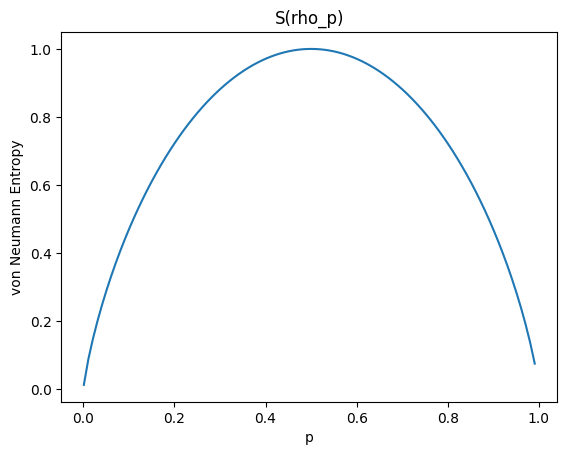

In [56]:
import matplotlib.pyplot as plt

p = np.arange(0.001, 1., 0.01)

# create list of von Neumann entropies
vn_y = list()
for value in p:
    rho_p = value*P11 + (1-value)*(P22)
    vn_y.append(von_neumann_entropy(rho_p))

# convert list of matrices to list of numbers for plotting
y = list()
for value in vn_y:
    y.append(value.tolist()[0][0])

# plot p vs. S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()

We can compare this to the classical Shannon entropy of

\begin{align}
H(p, 1-p) = -(p\log(p) + (1-p)\log(1-p))
\end{align}

and see that they are in fact the same.

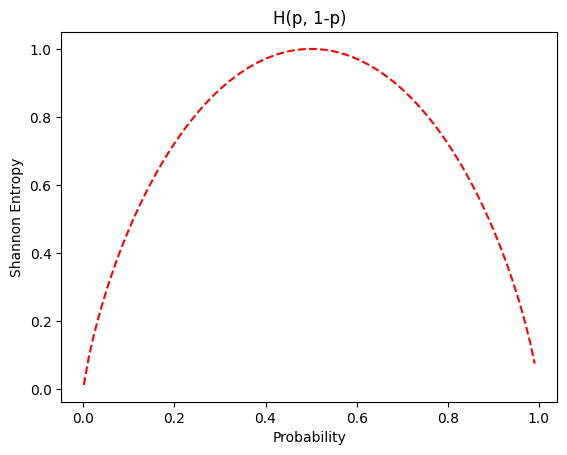

In [57]:
p = np.arange(0.001, 1., 0.01)

plt.xlabel('Probability')
plt.ylabel('Shannon Entropy')
plt.title('H(p, 1-p)')
plt.plot(p, -( p*np.log2(p) + (1-p)*np.log2(1-p)), 'r--')
plt.show()

Let's now have a look at a slightly different example of a one parameter family of density matrices,

\begin{align}
\rho(p) &= p(|0\rangle \langle 0|+|1\rangle \langle 1|) + (1-p) \frac{(|0\rangle + |1\rangle )(\langle 0| + \langle 1|)}{2}\\
&= \frac{p}{2}
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} + \frac{(1-p)}{2}
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} \\
&=
\begin{pmatrix}
p/2 & 0 \\
0 & p/2
\end{pmatrix} +
\begin{pmatrix}
(1-p)/2 & (1-p)/2 \\
(1-p)/2 & (1-p)/2
\end{pmatrix}.
\end{align}

In [58]:
# Define spin-up
u = np.matrix([[1],
               [0]])

# Define spin-down
d = np.matrix([[0],
               [1]])

# Define the pure state |0><0|
P11 = np.dot(u, u.H)

# Define the pure state |0><1|
P12 = np.dot(u, d.H)

# Define the pure state |1><0|
P21 = np.dot(d, u.H)

# Define the pure state |1><1|
P22 = np.dot(d, d.H)

# Define the mixed state |0><0| + |1><1|
I = (P11+P22)/2

# Define the pure state |0><0|+|0><1|+|1><0|+|1><1|
D = (P11+P12+P21+P22)/2

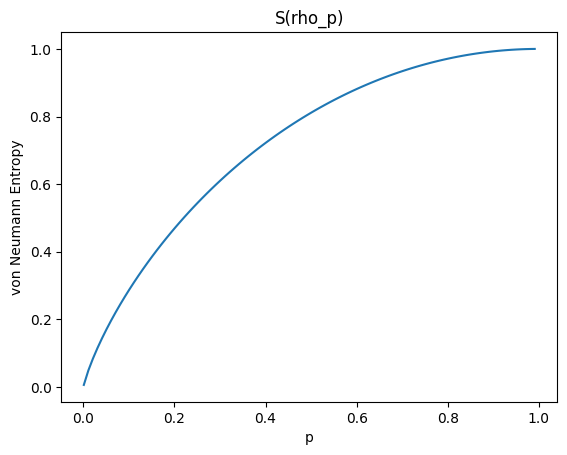

In [59]:
p = np.arange(0.001, 1., 0.01)

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    rho = value*I + (1-value)*(D)
    vn_y.append(von_neumann_entropy(rho))

# convert list of matrices to list of numbers for plotting
y = list()
for value in vn_y:
    y.append(value.tolist()[0][0])


# plot p vs. S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()

Notice how one side of the curve corresponds to the *pure state*

\begin{align}
|\psi\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle,
\end{align}

since

\begin{align}
|+\rangle \langle +| =
\frac{1}{2}
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix}.
\end{align}

The opposite side of the curve (to the far right) corresponds to the *mixed state*

\begin{align}
\frac{|0\rangle \langle 0|}{2} + \frac{|1\rangle \langle 1|}{2} =
\begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}.
\end{align}

We can see as the system evolves from pure to mixed the von Neumann entropy approches $S(\rho(1)) = 1$. In general, for finite systems the von Neumann entropy $S(\rho)$ encodes the departure of the system from a pure state, and described the degree of mixing in the state. For zero mixing (pure states), the von Neumann entropy is always zero.

## Properties of von Neumann Entropy

1. $S(\rho) = 0$ if and only if $\rho$ is a pure state.
2. For $dim(\mathbb{H}) = N$ the dimension of the Hilbert space, $S(\rho) = \log(N)$ gives the maximum value of $S(\rho)$ for a *maximally mixed state*.
3. $S(\rho)$ is invariant under basis change, i.e. $S(\rho) = S(U \rho U^{\dagger})$ for any unitary matrix $U$.
4. For a set of numbers $\{\lambda_k\}$ such that $\sum_k \lambda_k =1$ and $\lambda_k >0$, and for a corresponding collection of density matrices $\{\rho_k\}$ we have

\begin{align}
S\left(\sum_k \lambda_k \rho_k \right) \geq \sum_k \lambda_k S(\rho_k),
\end{align}

making the von Neumann entropy *concave*.

5. For a set of numbers as above, $S(\rho)$ satisfies

\begin{align}
S\left(\sum_k \lambda_k \rho_k \right) \leq \sum_k \lambda_k S(\rho_k) - \sum_k \lambda_k \log(\lambda_k),
\end{align}

and equality is achieved if the $\rho_k$ have orthogonal support.

6. $S(\rho_{AB}) = S(\rho_A \otimes \rho_B) = S(\rho_A)+S(\rho_B)$ for independent systems $A$ and $B$.
7. $S(\rho_{ABC})+S(\rho_B) \leq S(\rho_{AB})+S(\rho_{BC})$.
8. $S(\rho_{AC}) \leq S(\rho_A)+S(\rho_C)$.
9. Projective measurement can increase entropy, but generalized measurement can increase entropy (see pg. 515 of Nielsen & Chuang).

## Example: Entanglement Entropy of GHZ with Qiskit

### Creating a GHZ-state

The following code creates a quantum circuit that prepares a GHZ-state, and prints the state vector as a column (ket) vector.

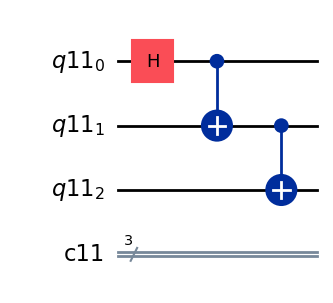

In [60]:
from qiskit import *
import numpy as np
%matplotlib inline

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

GHZ.h(0)
GHZ.cx(0,1)
GHZ.cx(1,2)
GHZ.draw(output='mpl')

Next, we can use `Statevector()` function from Qiskti to print the state vector as well. This will be useful for computing the von Neumann entropy of the corresponding density matrix using the function `entropy()` in Qiskit.

In [61]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np
%matplotlib inline

# Create quantum circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

# Build GHZ state
GHZ.h(0)
GHZ.cx(0, 1)
GHZ.cx(1, 2)


# Get statevector directly
GHZ_state = Statevector(GHZ)
print(GHZ_state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


Next, we use the `DensityMatrix()` function from Qiskit by passing it the `GHZ_state` ket-vector we defined above.

In [62]:
from qiskit.quantum_info import DensityMatrix
D = DensityMatrix(GHZ_state)
print(D)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2))


Now we can compute the entropy using the Qiskit `entropy()` function. We can pass it either the `Statevector` or the `DensityMatrix`. In the second case, we get effectively zero entropy, in the first we get exactly zero. This makes sense because the state is a pure state and the density matrix is computed as $D = |\psi\rangle \langle \psi|$.

In [63]:
from qiskit.quantum_info import entropy
vn_entropy1 = entropy(psi, base=2)
vn_entropy2 = entropy(D, base=2)
print(vn_entropy1)

0


In [68]:
# very close to zero (numerically)
print(vn_entropy2)

1.4415419267167124e-15


Finally, let's generate a random density matrix $\rho$ using the Qiskit function `random_density_matrix()`. This function's first argument is the dimension of the desired density matrix, which need not be a power of two. However, in the context of quantum circuits with qubits, it is important we make this restriction manually. There are of course more general systems involving things such as "*qudits*" which might yield arbitrary dimensional density matrices.

In [65]:
from qiskit.quantum_info import random_density_matrix
rho = random_density_matrix(8, rank=None, method='Hilbert-Schmidt', seed=None)
print(rho)

DensityMatrix([[ 0.12425536-3.37456969e-19j,  0.01592526-8.19949365e-02j,
                 0.05155881+1.29952048e-02j,  0.01801674+4.29620101e-03j,
                 0.08410964-2.32541491e-02j,  0.02175512+4.73129955e-02j,
                 0.04506671+5.07417362e-02j, -0.0480507 +4.96850996e-02j],
               [ 0.01592526+8.19949365e-02j,  0.14373501+2.03177934e-19j,
                 0.00393374+7.83975612e-02j, -0.00729005+6.94489413e-03j,
                 0.08007931+6.90490966e-02j, -0.0144539 +4.59498380e-02j,
                -0.02549461+1.45810902e-03j, -0.0113605 -1.60018251e-02j],
               [ 0.05155881-1.29952048e-02j,  0.00393374-7.83975612e-02j,
                 0.12595197+5.60619165e-19j,  0.0438376 +1.43123584e-02j,
                 0.01993475-6.93910724e-02j,  0.01168158+4.02111137e-03j,
                 0.00220422+1.33803412e-02j, -0.04216621+4.70354972e-02j],
               [ 0.01801674-4.29620101e-03j, -0.00729005-6.94489413e-03j,
                 0.0438376 -1.43123

We can compute the entropy using the Qiskit `entropy()` function.

In [66]:
entropy(rho, base=2)

np.float64(2.1127709118902156)

Let's plot the entropy of the system that evolved from the state given by the density matrix $D$ of the GHZ-state to the system described by the density matrix $\rho$.

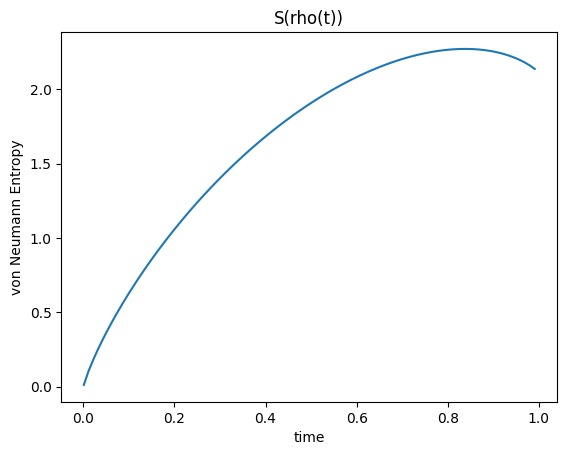

In [67]:
time = np.arange(0.001, 1., 0.01)

vn_entropy = list()
for t in time:
    vn_entropy.append(entropy(D, base=2)*t + entropy(rho, base=2)*(1-t))

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    M = value*rho + (1-value)*(D)
    vn_y.append(entropy(M))

# convert list of matrices to list of numbers for plotting
# y = list()
# for value in vn_y:
#    y.append(value.tolist()[0][0])


# plot p vs. S(rho_p)
plt.xlabel('time')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho(t))')
plt.plot(p, vn_y, color='tab:blue')
plt.show()

## Exercises

1. Construct a circuit that prepares the Bell state $|\psi\rangle = \beta_{00} = (|00\rangle + |11\rangle)/\sqrt{2}$
2. Use the `Statevector_Simulator` backend in Qiskit to get the state vector and print it as a column vector.
3. Compute the density matrix $\rho = |\psi\rangle \langle \psi|$ using the `np.dot()` function from NumPy.
4. Use the function `von_neumann_entropy()` to compute the von Neumann entropy of $\rho$.
5. Use the function `vn_eig_entropy()` to compute the von Neumann entropy of $\rho$.
6. Use the Qiskit function `Statevector()` as the argument of the Qiskit function `entropy()` to compute the von Neumann entropy of $\rho$.
7. Use the Qiskit function `DensityMatrix()` as the argument of the Qiskit function `entropy()` to compute the von Neumann entropy of $\rho$.
8. Verify that you get zero (or effectively zero) for all methods of computing the von Neumann entropy of $\rho$.
9. For extra practice, repeat steps (1)-(8) for the Bell states $\beta_{01}, \beta_{10},$ and $\beta_{11}$.
10. Try ploting the entropy as the the state evolves from $\beta_{00}$ to $\beta_{01}$. You should get zero entropy at either end of your graph, and a nonzero value for all mixed states in between.